In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
# plot function
def numerical_plotting(data, col, title, symb, ylabel, color):
    fig, ax = plt.subplots(2, 1, 
                           sharex=True, 
                           figsize=(20, 8),
                           facecolor="#FFFFFF",
                           gridspec_kw={"height_ratios": (.2, .8)})
    
    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")
    
    ax[0].set_title(title, 
                    weight="bold", 
                    fontsize=30, 
                    pad=30)
    
    sns.boxplot(x=col, 
                data=data,
                color=color,
                ax=ax[0])
    
    ax[0].set(yticks=[])
    
    sns.distplot(data[col], kde=True, color=color)
    
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    
    ax[0].set_xlabel(col, weight="bold", fontsize=15, labelpad=15)
    ax[1].set_xlabel(col, weight="bold", fontsize=15)
    ax[1].set_ylabel(ylabel, weight="bold", fontsize=15)
    
    plt.axvline(data[col].mean(), 
                color='darkgreen', 
                linewidth=2.2, 
                label='mean=' + str(np.round(data[col].mean(),1)) + symb)
    plt.axvline(data[col].median(), 
                color='red', 
                linewidth=2.2, 
                label='median='+ str(np.round(data[col].median(),1)) + symb)
    plt.axvline(data[col].max(), 
                color='blue', 
                linewidth=2.2, 
                label='max='+ str(np.round(data[col].max(),1)) + symb)
    plt.axvline(data[col].min(), 
                color='orange', 
                linewidth=2.2, 
                label='min='+ str(np.round(data[col].min(),1)) + symb)
    plt.axvline(data[col].mode()[0], 
                color='purple', 
                linewidth=2.2, 
                label='mode='+ str(data[col].mode()[0]) + symb)
    
    
    plt.legend(bbox_to_anchor=(1, 1), 
               ncol=1, 
               fontsize=17, 
               fancybox=True, 
               shadow=True, 
               frameon=False)
    
    plt.tight_layout()
    plt.show()
    
def count_pie_plot(datapie, datacount, colpiey, colcount, text1, text2, piecomap,
                   xlabel, ylabel, xticklabel, yticklabel, ystart, yend, pielabels, yplus, 
                   piefs=10, countcomap=None, pctdistance=0.65, fontsize=15, xtickrotation=None):

    # Subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   nrows=1, 
                                   facecolor=("#FFFFFF"),
                                   figsize=(24, 8))

    datapie.plot(kind="pie", 
                 y=colpiey,
                 autopct='%1.1f%%',
                 labels=None,
                 startangle=90,
                 colors=piecomap,
                 wedgeprops=dict(width=0.15),
                 pctdistance=pctdistance,
                 fontsize=piefs,
                 ax=ax1,
                 textprops=dict(color="black", 
                                weight="bold"))
    
    sns.countplot(x=colcount,
                  data=datacount,
                  palette=countcomap,
                  ax=ax2)

    #title
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(x0, y1 * 1.40, 
             text1, 
             fontsize=30, 
             ha="left", 
             va="center", 
             weight="bold")
    ax1.text(x0, y1 * 1.25, 
             text2, 
             fontsize=18, 
             ha="left", 
             va="center")
    
    ax1.legend(pielabels, 
               loc="upper left", 
               bbox_to_anchor=(x0*0.01, y1*0.85), 
               prop={'size': 10.5}, frameon=False, ncol=len(datapie))
    
    ax2.set_xlabel(xlabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_ylabel(ylabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_xticklabels(labels=xticklabel,
                        weight="semibold",
                        fontsize=10,
                        rotation=xtickrotation)
    ax2.set_yticklabels(labels=yticklabel,
                        weight="semibold",
                        fontsize=10)

    # data label
    i=0

    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height() + yplus
        ax2.text(x, y, value, ha="center", va="center", fontsize=15, weight="semibold") 

    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
    
    plt.tight_layout()
    return fig

def countplot_y(data, xplus, coly, sizey, text1, text2, 
                xlabel, ylabel, xstart, xend, ytimes1, ytimes2):

    fig, ax = plt.subplots(ncols=1,
                           nrows=1,
                           facecolor=("#FFFFFF"),
                           figsize=(24, sizey))

    sns.countplot(y=coly,
                  data=data,
                  palette=['#E0144C', '#FF5858', '#3AB0FF', '#FFB562', '#6FEDD6', '#6D9885'],
                  ax=ax)

    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    ax.text(x0, y1 * ytimes1, 
            text1, fontsize=30, 
            ha="left", va="center", weight="bold")
    ax.text(x0, y1 * ytimes2, 
            text2, fontsize=18, 
            ha="left", va="center")

    plt.xticks(weight="bold",
               fontsize=10)
    plt.yticks(weight="bold",
               fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=25, labelpad=20)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=25, labelpad=20)

    # data label
    i=0

    for p in ax.patches:
        value = f'{p.get_width()}'
        if i < 7:
            x1 = -1.2
        else:
            x1 = 1.2

        i+=1
        x = p.get_x() + p.get_width() + xplus
        y = p.get_y() + p.get_height() -.4
        ax.text(x, y, value, ha='center', va='center', fontsize=15, weight='semibold') 

    plt.tight_layout()
    ax.set_xlim(xstart, xend)
    ax.set_facecolor("#FFFFFF")
    
    return fig

def bivariate_numerical_plot(data, x, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(20, 6), 
                           facecolor="#FFFFFF")
    sns.kdeplot(data=data, 
                x=x, 
                hue=hue, 
                fill=True)
    
    ax.set_facecolor("#FFFFFF")
    
    plt.title(title, weight="bold", 
              fontsize=25, pad=30)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.tight_layout()
    plt.show()
    
def mtvboxplot(data, x, y, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(24, 8))
    sns.boxplot(x=x, y=y, hue=hue, 
                data=data, ax=ax)
    plt.title(title, weight="bold", 
              fontsize=25, pad=25)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.tight_layout()
    plt.show()

In [4]:
# stat function

def spearman_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Spearman's Correlation
    coef, p = stats.spearmanr(data1, data2)
    print(f"Spearmans correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def pearson_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Pearson's Correlation
    coef, p = stats.pearsonr(data1, data2)
    print(f"Pearson correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def skew_kurtosis(data, title):
    skw = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, bias=False)
    
    print("-" * 20, title, "-" * 20)
    print(f"Skewness: {skw}")
    if (skw < -1) and (skw > 1):
        print("Highly skewed")
    elif (-1 < skw < -0.5) or (1 < skw < 0.5):
        print("Moderately skewed")
    elif (-0.5 < skw < 0.5):
        print("Approximately symmetric")
    print("-" * 35)
    print(f"Kurtosis: {kurt}")
    if (kurt > 1):
        print("The distribution is too peaked")
    elif (kurt < -1):
        print("The distribution is too flat")
    else:
        print("The distribution is non-normal")
    print("-" * 35)
    
def chebychev(data, title, interpret):
    mu = round(data.mean(), 1)
    s = round(data.std(), 1)
    
    fc = round(mu - (2 * s), 1)
    sc = round(mu + (2 * s), 1)
    
    print("-" * 20, f"Interpretation of {title}", "-" * 20)
    print(f"first calc: {fc}")
    print(f"second calc: {sc}")
    print(interpret)
    print("-" * 40)

In [5]:
df_test = pd.read_csv('data/loan_sanction_test.csv')
df_train = pd.read_csv('data/loan_sanction_train.csv')

In [6]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,NaN,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,Y


In [7]:
df_train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(5))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_train)

##################### Shape #####################
(614, 13)
##################### Types #####################
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
##################### Head #####################
    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0  LP001002   Male      No          0      Graduate            No             5849   
1  LP001003   Male     Yes          1      Graduate            No             4583   
2  LP001005   Male     Yes          0      Graduate           Yes             3000   
3  LP001006   Male     Yes          0  Not Graduate            No             2583   
4  LP001008   Male  

In [9]:
#converting dependents to str, then dropping 3+, 3 represents 3+
df_train['Dependents'] = df_train['Dependents'].apply(lambda x: str(x).split('+')[0])

In [10]:
df_train.Dependents.unique()

array(['0', '1', '2', '3', 'nan'], dtype=object)

## Data cleaning

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

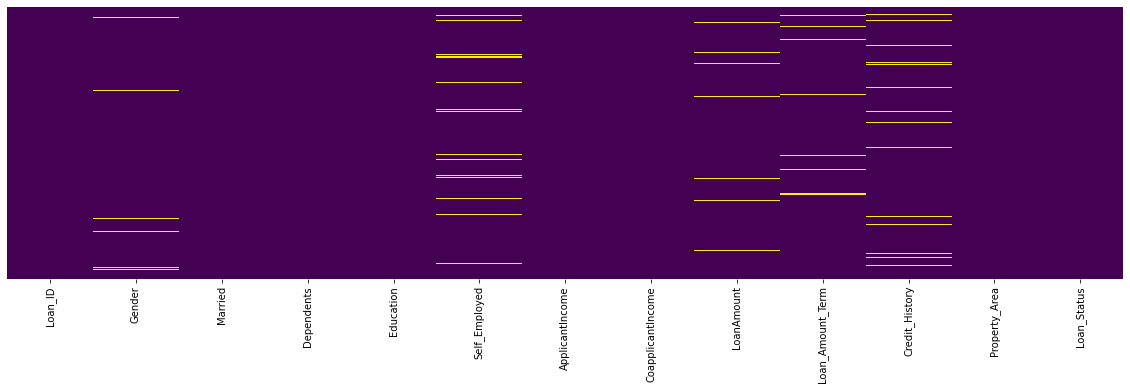

In [11]:
#plotout columns with missing data
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [12]:
#column names to lower case
df_train.columns = df_train.columns.str.lower()
df_train.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history',
       'property_area', 'loan_status'],
      dtype='object')

In [13]:
df_train.self_employed.value_counts()

No     500
Yes     82
Name: self_employed, dtype: int64

In [14]:
df_train.credit_history.value_counts()

1.000    475
0.000     89
Name: credit_history, dtype: int64

In [15]:
df_train.loan_amount_term.value_counts()

360.000    512
180.000     44
480.000     15
300.000     13
240.000      4
84.000       4
120.000      3
60.000       2
36.000       2
12.000       1
Name: loan_amount_term, dtype: int64

In [16]:
df_train.loanamount.value_counts()

120.000    20
110.000    17
100.000    15
160.000    12
187.000    12
           ..
240.000     1
214.000     1
59.000      1
166.000     1
253.000     1
Name: loanamount, Length: 203, dtype: int64

In [17]:
df_train.dependents.value_counts()

0      345
1      102
2      101
3       51
nan     15
Name: dependents, dtype: int64

In [18]:
df_train.gender.value_counts()

Male      489
Female    112
Name: gender, dtype: int64

In [19]:
#Find the total number of missing values from the entire dataset
df_train.isnull().sum().sum()

134

#### How many missing data points do we have?

###### Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [20]:
# get the number of missing data points per column
missing_values_count = df_train.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:14]

loan_id               0
gender               13
married               3
dependents            0
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [21]:
# how many total missing values do we have?
total_cells = np.product(df_train.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(f"{percent_missing:.2f}%")

1.68%


In [22]:
#replace nan with most frequent
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# imputer.fit_transform(df_train['dependents'].values.reshape(-1, 1))
df_train['dependents'] = df_train['dependents'].apply(lambda x: x.replace('nan','0'))

In [23]:
df_train['dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

### Filling out missing data
For categorical columns, we shall use mode to fillout all missing values

In [24]:
#Replace the missing values for categorical columns with mode
df_train['gender'] = df_train['gender'].fillna(df_train['gender'].mode()[0])
df_train['married'] = df_train['married'].fillna(df_train['married'].mode()[0])
df_train['self_employed'] = df_train['self_employed'].fillna(df_train['self_employed'].mode()[0])
df_train.isnull().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

For numerical columns, we have to first do outlier analysis. for columns with outliers we use medium of the series to fill out missing data and for data with no outliers we use mean

In [25]:
#Checking for outliers in loan_amount_term column
def detect_outliers(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

In [26]:
print(detect_outliers(df_train['loan_amount_term']))

[]


In [27]:
df_train.loan_amount_term.value_counts()

360.000    512
180.000     44
480.000     15
300.000     13
240.000      4
84.000       4
120.000      3
60.000       2
36.000       2
12.000       1
Name: loan_amount_term, dtype: int64

our function above returns no outliers, but by observation we have 480 which is isolated from the rest of the values, so not to tamper alot with data integrity we shall use medium to fill missing data

In [28]:
#our function above returns no outliers, but by observation we have 480 which is isolated from the rest of the values, so not to tamper alot with data integrity we shall use medium to fill missing data
df_train['loan_amount_term']= df_train['loan_amount_term'].fillna(df_train['loan_amount_term'].median())

In [29]:
df_train.isnull().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term      0
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [30]:
#Checking for outliers in credit_history column
print(detect_outliers(df_train['credit_history']))

[]


In [31]:
#Checking for outliers in loanamount column
print(detect_outliers(df_train['loanamount']))

[]


We are using mean to fillout missing values since we see no outliers

In [32]:
#Replace the missing values for numerical columns with mean
df_train['loanamount'] = df_train['loanamount'].fillna(df_train['loanamount'].mean())
df_train['credit_history'] = df_train['credit_history'].fillna(df_train['credit_history'].mean())

In [33]:
df_train.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [34]:
#Replace the missing value with '0' using 'fiilna' method
df_train['dependents'] = df_train['dependents'].fillna(0)
df_train['dependents'].isnull().sum()

0

In [35]:
df_train['dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: dependents, Length: 614, dtype: object

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

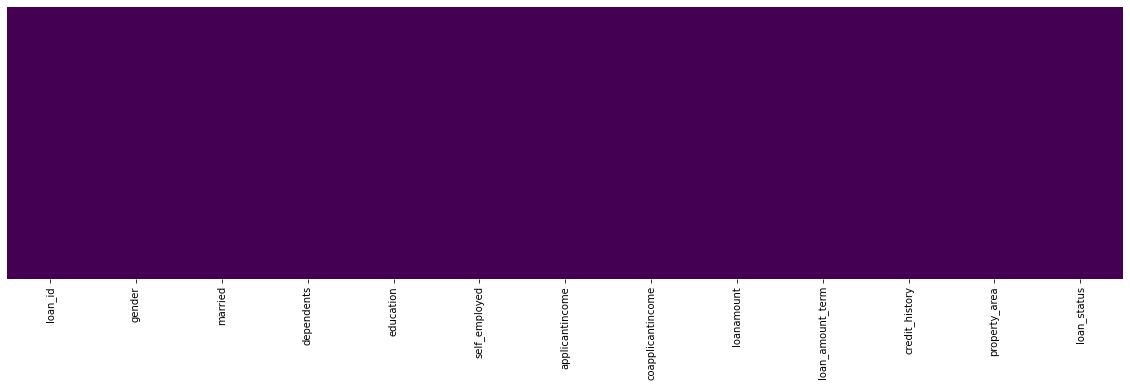

In [36]:
#plotout columns with missing data
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

### Uniqueness Categorical Variables
Let's have a look at categorical variables. How many unique values of these variables.

In [37]:
categorical = df_train.select_dtypes(['category', 'object']).columns # getting the Uniqueness catrgorical variable
for col in categorical:
    print('{} : {} unique value(s)'.format(col, df_train[col].nunique()))

loan_id : 614 unique value(s)
gender : 2 unique value(s)
married : 2 unique value(s)
dependents : 4 unique value(s)
education : 2 unique value(s)
self_employed : 2 unique value(s)
property_area : 3 unique value(s)
loan_status : 2 unique value(s)


In [38]:
df_train.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history',
       'property_area', 'loan_status'],
      dtype='object')

In [39]:
df_train.property_area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [40]:
df_train.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,146.412,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,Y


In [41]:
df_train.loan_status.unique()

array(['Y', 'N'], dtype=object)

<AxesSubplot:title={'center':'applicantincome'}, xlabel='loan_status'>

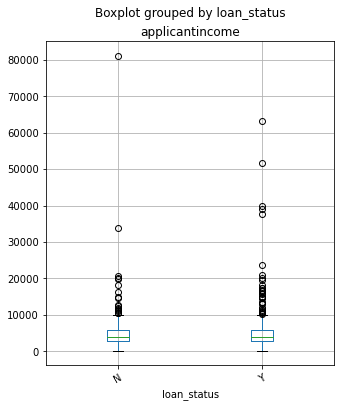

In [42]:
df_train.boxplot('applicantincome','loan_status',rot = 30,figsize=(5,6))


In [43]:
#getting the actual number of distinct values.
print(df_train['loan_status'].value_counts().count())

2


In [44]:
df_train.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,146.412,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,Y


#### Encoding loan status using  scikit-learn's LabelEncode

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
lb_make = LabelEncoder()
df_train['loan_status'] = lb_make.fit_transform(df_train['loan_status'])

In [47]:
df_train.loan_status.unique()

array([1, 0])

## Data Analysis

#### Descriptive Statistics

In [48]:
df_train.describe(exclude=[np.number])

,loan_id,gender,married,dependents,education,self_employed,property_area
count,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3
top,LP001002,Male,Yes,0,Graduate,No,Semiurban
freq,1,502,401,360,480,532,233


In [49]:
df_train.describe(include=[np.number])

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status
count,614.000,614.000,614.000,614.000,614.000,614.000
mean,5403.459,1621.246,146.412,342.410,0.842,0.687
std,6109.042,2926.248,84.037,64.429,0.350,0.464
min,150.000,0.000,9.000,12.000,0.000,0.000
25%,2877.500,0.000,100.250,360.000,1.000,0.000
50%,3812.500,1188.500,129.000,360.000,1.000,1.000
75%,5795.000,2297.250,164.750,360.000,1.000,1.000
max,81000.000,41667.000,700.000,480.000,1.000,1.000


In [50]:
# Grouping education by its income in min, max, and mean
df_train.groupby("education")["applicantincome"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

education,Graduate,Not Graduate
min,150.000,210.000
max,81000.000,18165.000
mean,5857.433,3777.284


In [51]:
# Grouping propertyarea by its income in min, max, and mean
df_train.groupby("property_area")["applicantincome"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

property_area,Rural,Urban,Semiurban
min,150.000,416.000,210.000
max,81000.000,63337.000,39999.000
mean,5554.084,5398.248,5292.262


In [52]:
df_train.groupby("gender")["applicantincome"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

gender,Male,Female
min,150.000,210.000
max,81000.000,19484.000
mean,5573.018,4643.473


In [53]:
# The average loan percentage of each gender
df_train.groupby(["gender"]).loan_status.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

gender,Male,Female
loan_status,69.124,66.964


In [54]:
# The average loan percentage of each number of dependants
df_train.groupby(["dependents"]).loan_status.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

dependents,2,0,1,3
loan_status,75.248,68.611,64.706,64.706


## Univariate Analysis

#### Chebychev's Theorem
Chebyshev's Theorem estimates the minimum proportion of observations
that fall within a specified number of standard deviations from the mean.
This theorem applies to a broad range of probability distributions.
Chebyshev's Theorem is also known as Chebyshev's Inequality
###### About skewness:
As a general rule of thumb: If skewness is less than −1 or greater than 1 , the distribution is highly skewed.
If skewness is between −1 and −0.5 or between 0.5 and 1 , the distribution is moderately skewed.
If skewness is between −0.5 and 0.5 , the distribution is approximately symmetric.
#### About kurtosis:
For kurtosis, the general guideline is that if the number is greater than +1 , the distribution is too peaked.
Likewise, a kurtosis of less than −1 indicates a distribution that is too flat.
Distributions exhibiting skewness and/or kurtosis that exceed these guidelines are considered non-normal.

#### Numerical Column

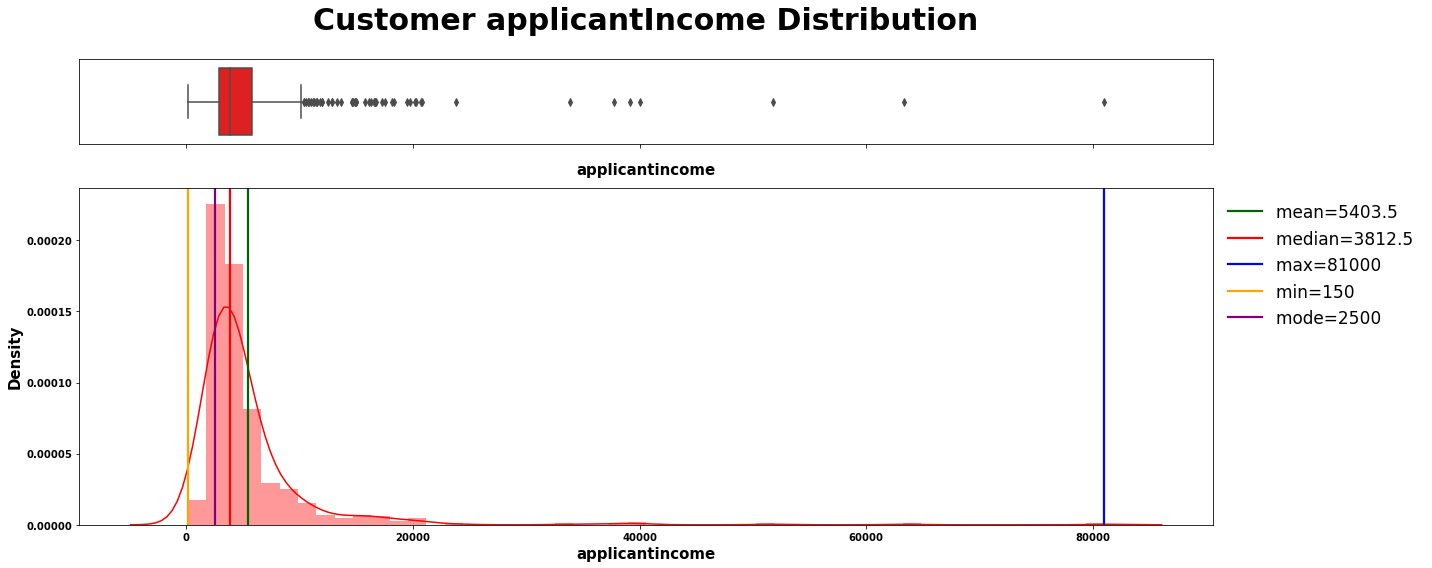

In [55]:
numerical_plotting(data=df_train, col="applicantincome", 
                   title="Customer applicantIncome Distribution", 
                   symb=" ", ylabel="Density", color="red");

In [56]:
chebychev(df_train.applicantincome, title="Income", 
          interpret=f"at least 75% customer income is lies between 0 and 17621.5 Shillings")

-------------------- Interpretation of Income --------------------
first calc: -6814.5
second calc: 17621.5
at least 75% customer income is lies between 0 and 17621.5 Shillings
----------------------------------------


In [57]:
skew_kurtosis(df_train.applicantincome, "Skew & Kurtosis Income")

-------------------- Skew & Kurtosis Income --------------------
Skewness: 6.539513113994624
-----------------------------------
Kurtosis: 60.54067593369114
The distribution is too peaked
-----------------------------------


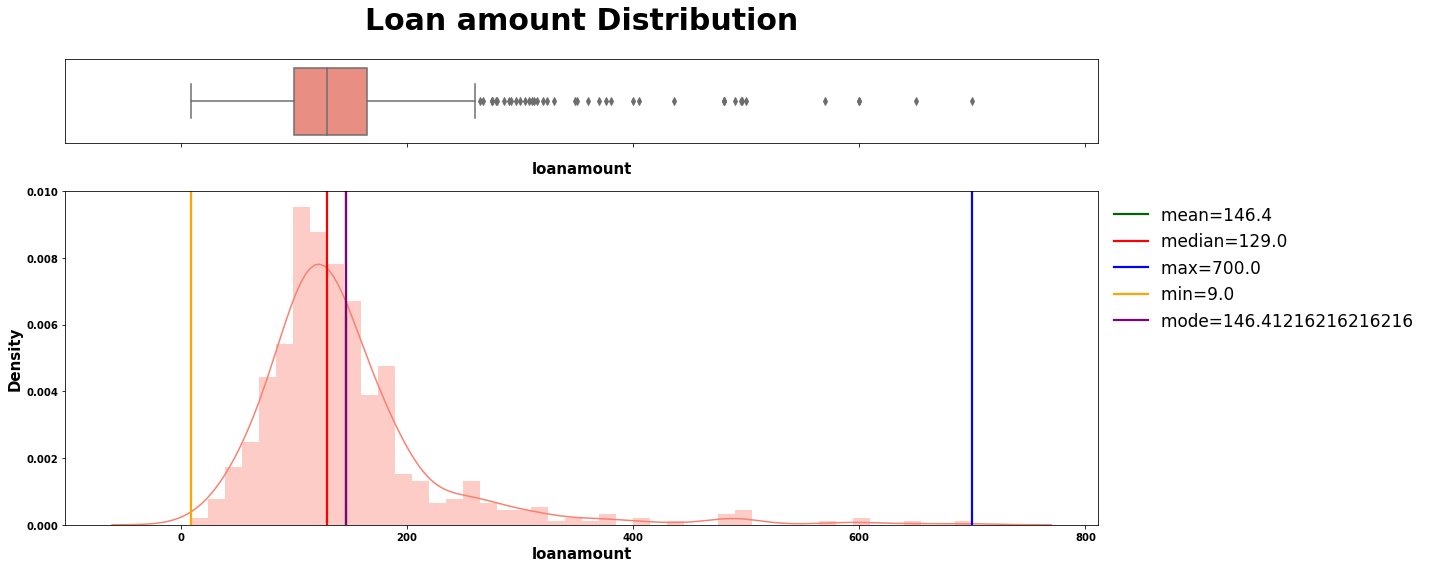

In [58]:
numerical_plotting(data=df_train, col="loanamount", 
                   title="Loan amount Distribution", 
                   symb=" ", ylabel="Density", color="salmon");

In [59]:
chebychev(df_train.loanamount, title="LoanAmount", 
          interpret=f"at least 75% customer age is lies between 0 and 314")

-------------------- Interpretation of LoanAmount --------------------
first calc: -21.6
second calc: 314.4
at least 75% customer age is lies between 0 and 314
----------------------------------------


In [60]:
skew_kurtosis(df_train.loanamount, "Skew & Kurtosis loan amount")

-------------------- Skew & Kurtosis loan amount --------------------
Skewness: 2.7266011441052984
-----------------------------------
Kurtosis: 10.896456468091559
The distribution is too peaked
-----------------------------------


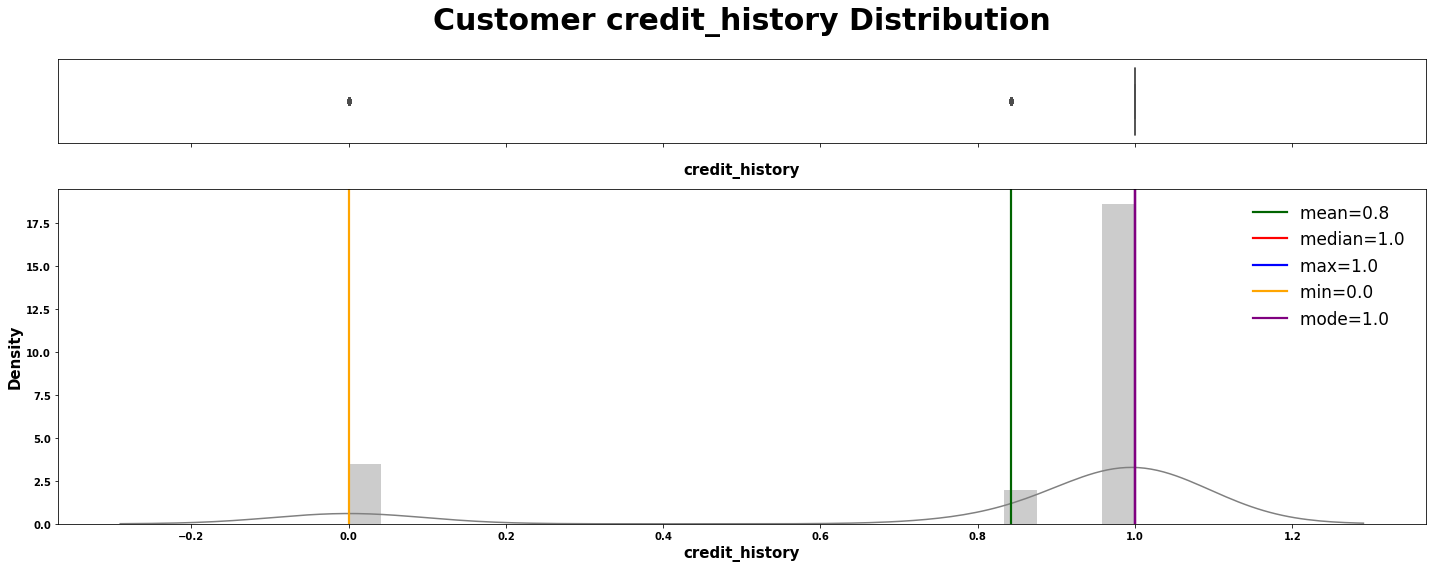

In [61]:
numerical_plotting(data=df_train, col="credit_history", 
                   title="Customer credit_history Distribution", 
                   symb=" ", ylabel="Density", color="gray");

In [62]:
chebychev(df_train.credit_history, title="credit_history", 
          interpret=f"at least 75% customer have 0 to 1.0 credit history")

-------------------- Interpretation of credit_history --------------------
first calc: 0.2
second calc: 1.4
at least 75% customer have 0 to 1.0 credit history
----------------------------------------


In [63]:
skew_kurtosis(df_train.credit_history, "Skew & Kurtosis credit_history")

-------------------- Skew & Kurtosis credit_history --------------------
Skewness: -1.963600485467902
-----------------------------------
Kurtosis: 1.9511593673663867
The distribution is too peaked
-----------------------------------


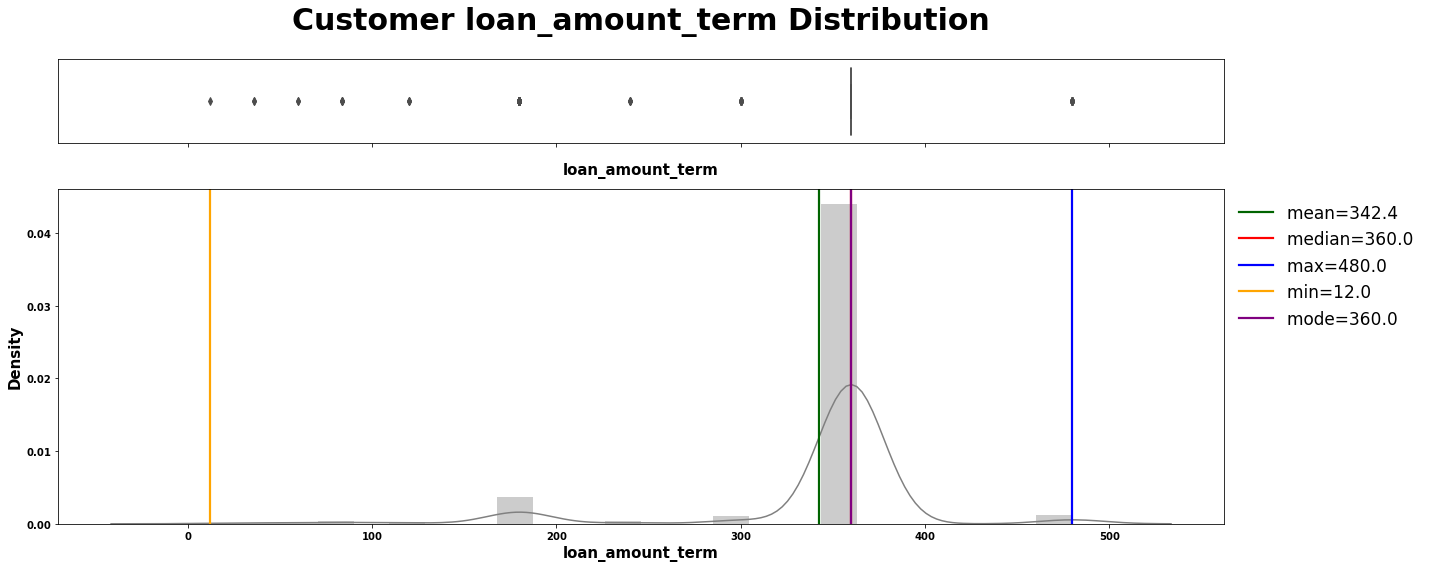

In [64]:
numerical_plotting(data=df_train, col="loan_amount_term", 
                   title="Customer loan_amount_term Distribution", 
                   symb=" ", ylabel="Density", color="gray");

In [65]:
chebychev(df_train.loan_amount_term, title="loan_amount_term", 
          interpret=f"at least 75% customer have 0 to 500 loan amount term")

-------------------- Interpretation of loan_amount_term --------------------
first calc: 213.6
second calc: 471.2
at least 75% customer have 0 to 500 loan amount term
----------------------------------------


In [66]:
skew_kurtosis(df_train.loan_amount_term, "Skew & Kurtosis loan_amount_term")

-------------------- Skew & Kurtosis loan_amount_term --------------------
Skewness: -2.402112256389039
-----------------------------------
Kurtosis: 6.924993328965204
The distribution is too peaked
-----------------------------------


#### Categorical Column

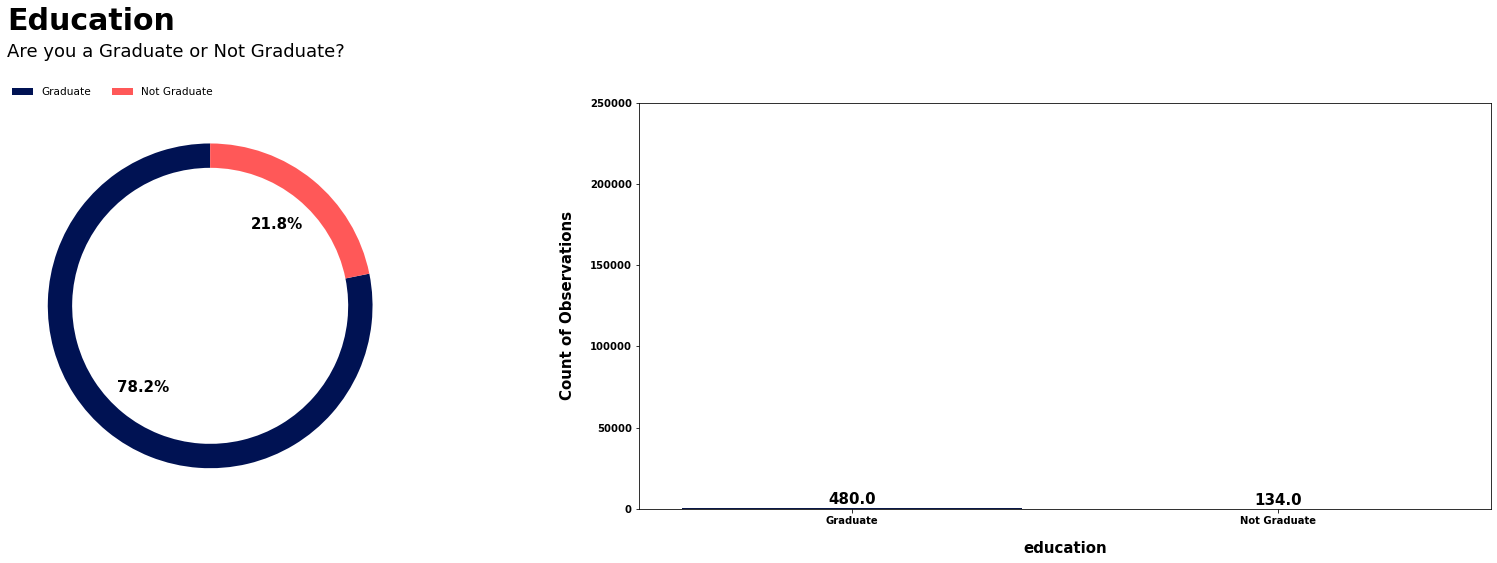

In [67]:
education = df_train["education"].value_counts()

count_pie_plot(datapie=education,
               datacount=df_train,
               colcount="education",
               colpiey=education.values,
               text1="Education",
               pielabels=["Graduate", "Not Graduate"],
               text2="Are you a Graduate or Not Graduate?",
               piecomap=["#001253", "#FF5858"],
               countcomap=["#001253", "#FF5858"],
               xlabel="education",
               piefs=15,
               yplus=5000,
               ylabel="Count of Observations",
               xticklabel=["Graduate", "Not Graduate"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

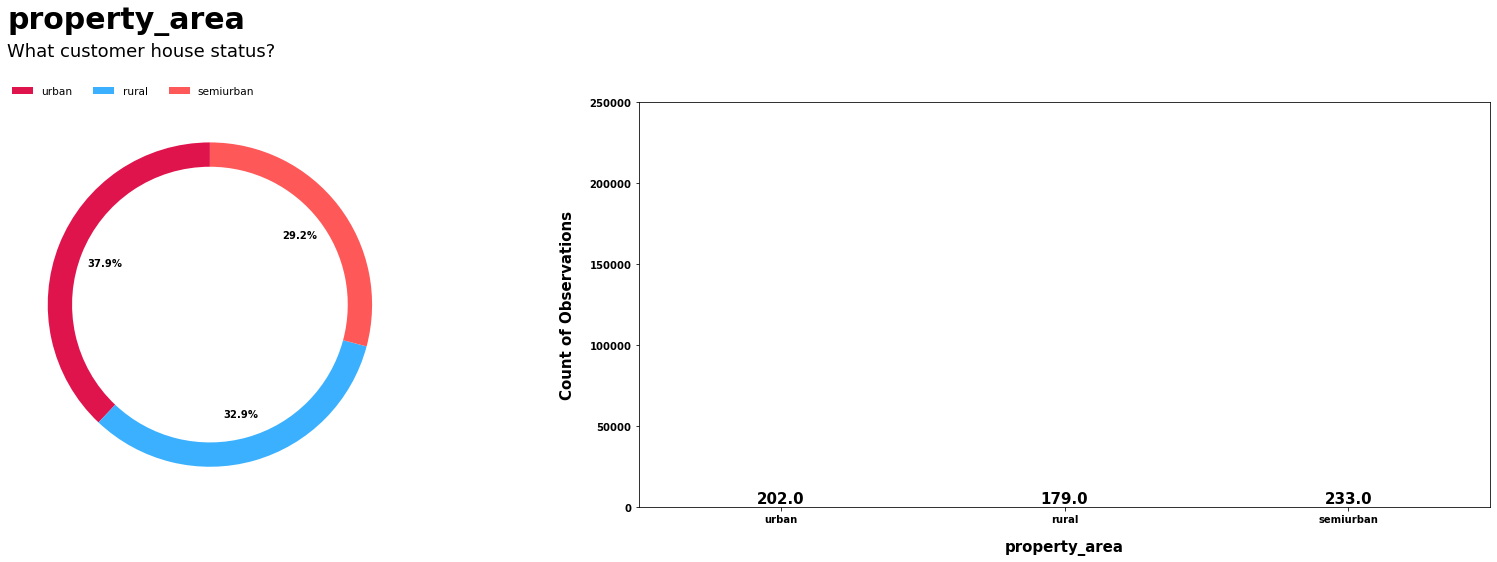

In [68]:
property_area = df_train["property_area"].value_counts()

count_pie_plot(datapie=property_area,
               datacount=df_train,
               colcount="property_area",
               colpiey=property_area.values,
               text1="property_area",
               pielabels=["urban", "rural", "semiurban"],
               text2="What customer house status?",
               piecomap=["#E0144C", "#3AB0FF", "#FF5858"],
               countcomap=["#E0144C", "#FF5858", "#3AB0FF"],
               xlabel="property_area",
               piefs=10,
               yplus=5000,
               pctdistance=0.7,
               ylabel="Count of Observations",
               xticklabel=["urban", "rural", "semiurban"],
               yticklabel=list(np.arange(0, 260000, 50000)),
               ystart=0,
               yend=250000);

## Bivariate Analysis

### What is Correlation?

Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.

Variables within a dataset can be related for lots of reasons.

For example:

One variable could cause or depend on the values of another variable. One variable could be lightly associated with another variable. Two variables could depend on a third unknown variable. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

Positive Correlation: both variables change in the same direction. Neutral Correlation: No relationship in the change of the variables. Negative Correlation: variables change in opposite directions. The performance of some algorithms can deteriorate if two or more variables are tightly related, called multicollinearity. An example is linear regression, where one of the offending correlated variables should be removed in order to improve the skill of the model.

We may also be interested in the correlation between input variables with the output variable in order provide insight into which variables may or may not be relevant as input for developing a model.

The structure of the relationship may be known, e.g. it may be linear, or we may have no idea whether a relationship exists between two variables or what structure it may take. Depending what is known about the relationship and the distribution of the variables, different correlation scores can be calculated.

Pearson’s Correlation

r=∑(xi−x¯)(yi−y¯)∑(xi−x¯)2∑(yi−y¯)2−−−−−−−−−−−−−−−−−−√

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between −1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below −0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

The pearsonr() SciPy function can be used to calculate the Pearson’s correlation coefficient between two data samples with the same length.

#### Nonparametric Rank Correlation

Correlation refers to the association between the observed values of two variables.

The variables may have a positive association, meaning that as the values for one variable increase, so do the values of the other variable. The association may also be negative, meaning that as the values of one variable increase, the values of the others decrease. Finally, the association may be neutral, meaning that the variables are not associated.

Correlation quantifies this association, often as a measure between the values −1 to 1 for perfectly negatively correlated and perfectly positively correlated. The calculated correlation is referred to as the “correlation coefficient.” This correlation coefficient can then be interpreted to describe the measures.

See the table below to help with interpretation the correlation coefficient.

Table

Correlation Coefficient for a Direct Relationship Correlation Coefficient for an inderect Relationship Relationship Strength of the Variables 0.0 0.0 None/trivial 0.1 −0.1 Weak/small 0.3 −0.3 Moderate/medium 0.5 −0.5 Strong/large 1.0 −1.0 Perfect The correlation between two variables that each have a Gaussian distribution can be calculated using standard methods such as the Pearson’s correlation. This procedure cannot be used for data that does not have a Gaussian distribution. Instead, rank correlation methods must be used.

Rank correlation refers to methods that quantify the association between variables using the ordinal relationship between the values rather than the specific values. Ordinal data is data that has label values and has an order or rank relationship; for example: ‘low‘, ‘medium‘, and ‘high‘.

Rank correlation can be calculated for real-valued variables. This is done by first converting the values for each variable into rank data. This is where the values are ordered and assigned an integer rank value. Rank correlation coefficients can then be calculated in order to quantify the association between the two ranked variables.

Because no distribution for the values is assumed, rank correlation methods are referred to as distribution-free correlation or nonparametric correlation. Interestingly, rank correlation measures are often used as the basis for other statistical hypothesis tests, such as determining whether two samples were likely drawn from the same (or different) population distributions.

Rank correlation methods are often named after the researcher or researchers that developed the method. Four examples of rank correlation methods are as follows:

Spearman’s Rank Correlation. Kendall’s Rank Correlation. Goodman and Kruskal’s Rank Correlation. Somers’ Rank Correlation. In the following sections, we will take a closer look at two of the more common rank correlation methods: Spearman’s

Spearman’s Rank Correlation

p=1−6∑d2in(n2−1)

Spearman’s rank correlation is named for Charles Spearman.

It may also be called Spearman’s correlation coefficient and is denoted by the lowercase greek letter rho (p). As such, it may be referred to as Spearman’s rho.

This statistical method quantifies the degree to which ranked variables are associated by a monotonic function, meaning an increasing or decreasing relationship. As a statistical hypothesis test, the method assumes that the samples are uncorrelated (fail to reject H0).

The Spearman rank-order correlation is a statistical procedure that is designed to measure the relationship between two variables on an ordinal scale of measurement.

— Page 124, Nonparametric Statistics for Non-Statisticians: A Step-by-Step Approach, 2009.

The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation (e.g. a parametric measure of correlation) using the rank values instead of the real values. Where the Pearson’s correlation is the calculation of the covariance (or expected difference of observations from the mean) between the two variables normalized by the variance or spread of both variables.

Spearman’s rank correlation can be calculated in Python using the spearmanr() SciPy function.

##### Numerical Column

In [69]:
pearson_correlation(df_train["applicantincome"], df_train["loan_status"], "Applicant Income & loan status Correlation")

--------------- Applicant Income & loan status Correlation ---------------

Pearson correlation coefficient: -0.005

Samples are uncorrelated (fail to reject H0) p=0.907



In [70]:
pearson_correlation(df_train["loan_amount_term"], df_train["loan_status"], "Applicant Income & loan status Correlation")

--------------- Applicant Income & loan status Correlation ---------------

Pearson correlation coefficient: -0.023

Samples are uncorrelated (fail to reject H0) p=0.577



In [71]:
pearson_correlation(df_train["credit_history"], df_train["loan_status"], "Applicant Income & loan status Correlation")

--------------- Applicant Income & loan status Correlation ---------------

Pearson correlation coefficient: 0.540

Samples are correlated (reject H0) p=0.000



In [72]:
pearson_correlation(df_train["loanamount"], df_train["loan_status"], "Applicant Income & loan status Correlation")

--------------- Applicant Income & loan status Correlation ---------------

Pearson correlation coefficient: -0.036

Samples are uncorrelated (fail to reject H0) p=0.368



In [73]:
#converting string to int
df_train['dependents'] = df_train['dependents'].astype('int64')

In [74]:
pearson_correlation(df_train["dependents"], df_train["loan_status"], "Applicant dependents & loan status Correlation")

--------------- Applicant dependents & loan status Correlation ---------------

Pearson correlation coefficient: 0.010

Samples are uncorrelated (fail to reject H0) p=0.802



In [75]:
df_train.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

## Multivariate Analysis

#### Categorical Column

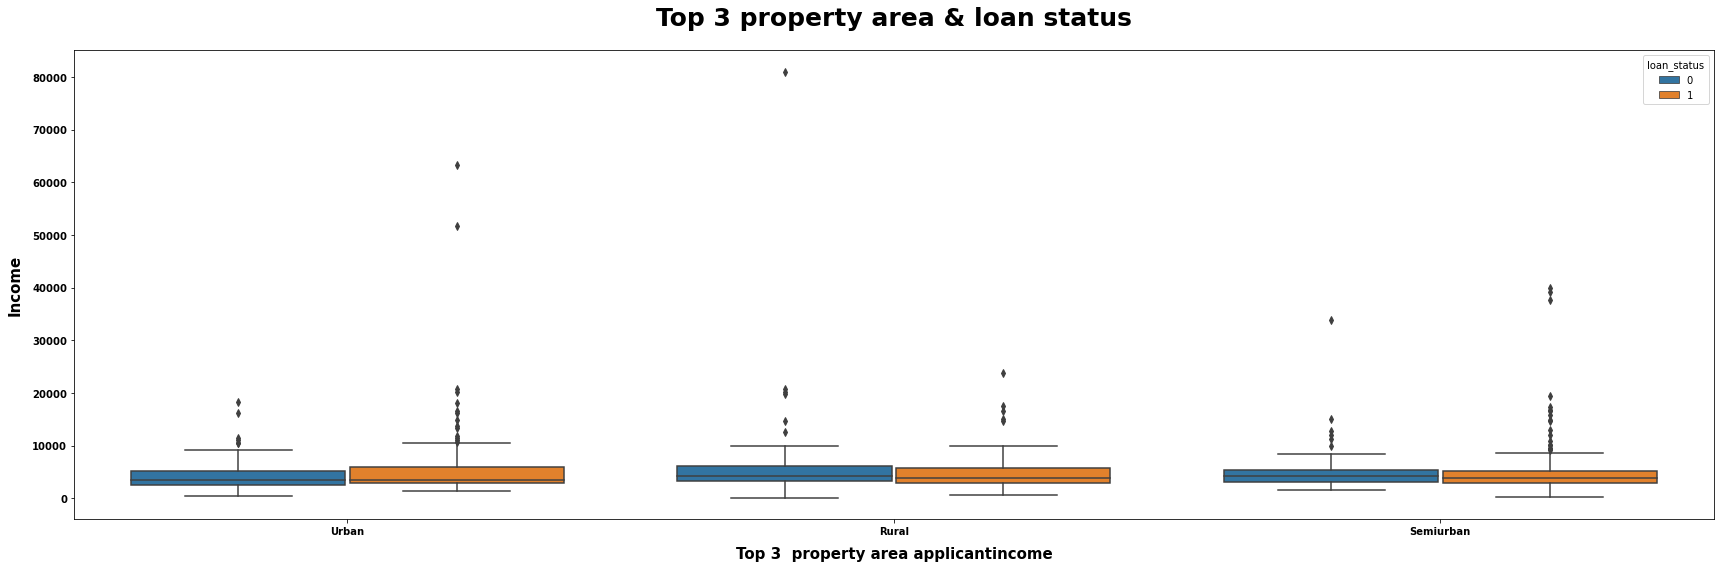

In [76]:
I = (df_train.loc[df_train["property_area"]
         .isin(["Urban", "Rural", "Semiurban"])]
         .loc[:, ["applicantincome", "property_area", "loan_status"]])

data = I
title = "Top 3 property area & loan status"
x = "property_area"
y = "applicantincome"
hue = "loan_status"
xlabel = "Top 3  property area applicantincome"
ylabel = "Income"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

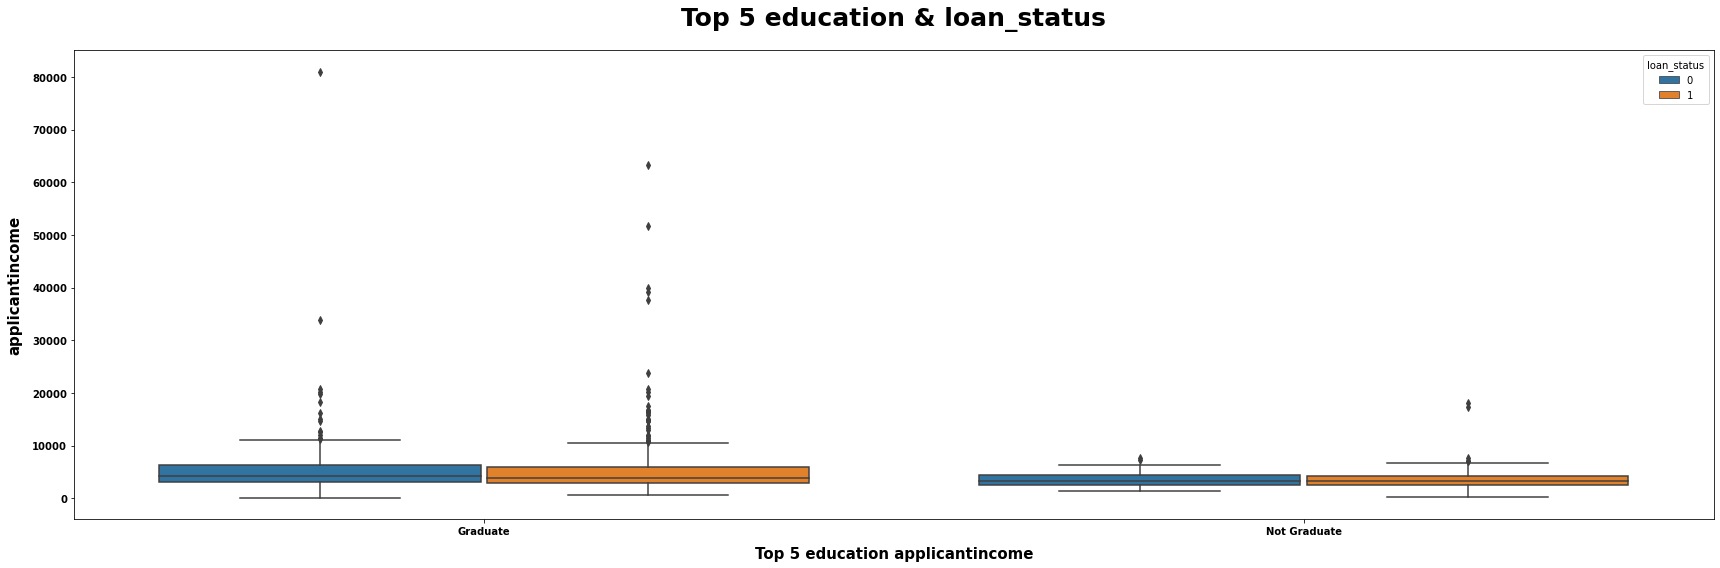

In [77]:
C = (df_train.loc[df_train["education"]
         .isin(["Graduate", "Not Graduate"])]
         .loc[:, ["applicantincome", "education", "loan_status"]])

data = C
title = "Top 5 education & loan_status"
x = "education"
y = "applicantincome"
hue = "loan_status"
xlabel = "Top 5 education applicantincome"
ylabel = "applicantincome"

mtvboxplot(data=data, title=title, x=x, y=y, 
           hue=hue, xlabel=xlabel, ylabel=ylabel);

In [78]:
df_train.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,146.412,360.000,1.000,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,1


##### Random Under-Sampling

In [91]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df_train = df_train.sample(frac=1)

In [92]:
# amount of fraud classes 492 rows.
loan_1 = df.loc[df_train["loan_status"] == 1]
loan_0 = df.loc[df_train["loan_status"] == 0][:30996]

normal_distributed_data = pd.concat([loan_1, loan_0])

NameError: name 'df' is not defined

### Numerical Column

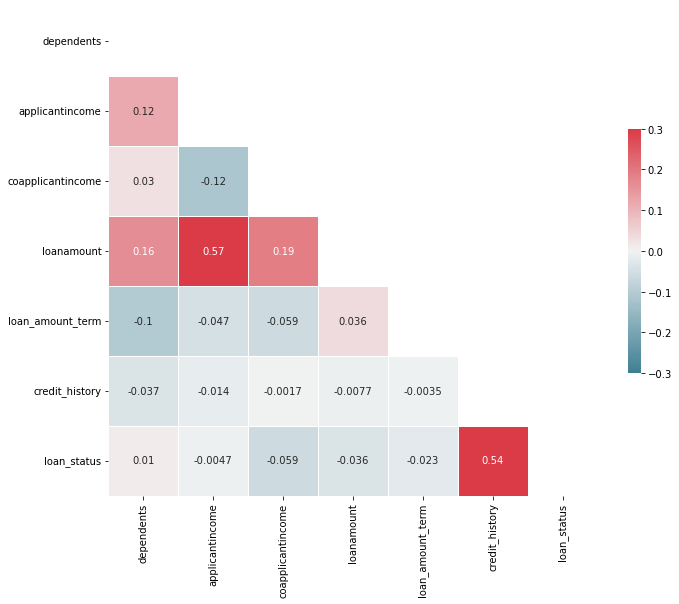

In [79]:
# Create the correlation matrix
corr = df_train.corr()

# Generate mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ration
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=.3,
            vmin=-.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5});

In [80]:
corr.style.background_gradient(cmap=cmap)

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status
dependents,1.000000,0.118202,0.030430,0.163106,-0.103864,-0.037392,0.010118
applicantincome,0.118202,1.000000,-0.116605,0.565620,-0.046531,-0.014477,-0.004710
coapplicantincome,0.030430,-0.116605,1.000000,0.187828,-0.059383,-0.001665,-0.059187
loanamount,0.163106,0.565620,0.187828,1.000000,0.036475,-0.007738,-0.036416
loan_amount_term,-0.103864,-0.046531,-0.059383,0.036475,1.000000,-0.003546,-0.022549
credit_history,-0.037392,-0.014477,-0.001665,-0.007738,-0.003546,1.000000,0.540483
loan_status,0.010118,-0.004710,-0.059187,-0.036416,-0.022549,0.540483,1.000000


## Data Preprocessing

#### Getting Mutual Info

In [81]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# define column has type Object to implement LabelEncoder
list_object = df_train.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    df_train[col] = encoder.fit_transform(df_train[col].values.tolist())

In [82]:
# getting the Mutual Information about the data
X_mutual = df_train.astype("int64").reset_index().copy()
y_mutual = X_mutual.pop("loan_status")

del X_mutual["loan_id"]

# all discrete features should now have integer dtypes
discrete_features = X_mutual.dtypes == int

# mi scores function
def make_mi_scores(X_mutual, y_mutual, discrete_features):
    mi_scores = mutual_info_classif(X_mutual, y_mutual, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mutual.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_mutual, y_mutual, discrete_features)
mi_scores.to_frame()

,MI Scores
index,0.621
applicantincome,0.517
coapplicantincome,0.290
loanamount,0.204
credit_history,0.088
loan_amount_term,0.012
property_area,0.010
married,0.004
education,0.004
dependents,0.003


In [83]:
X_mutual.head()

,index,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,0,1,0,0,0,0,5849,0,146,360,1,2
1,1,1,1,1,0,0,4583,1508,128,360,1,0
2,2,1,1,0,0,1,3000,0,66,360,1,2
3,3,1,1,0,1,0,2583,2358,120,360,1,2
4,4,1,0,0,0,0,6000,0,141,360,1,2


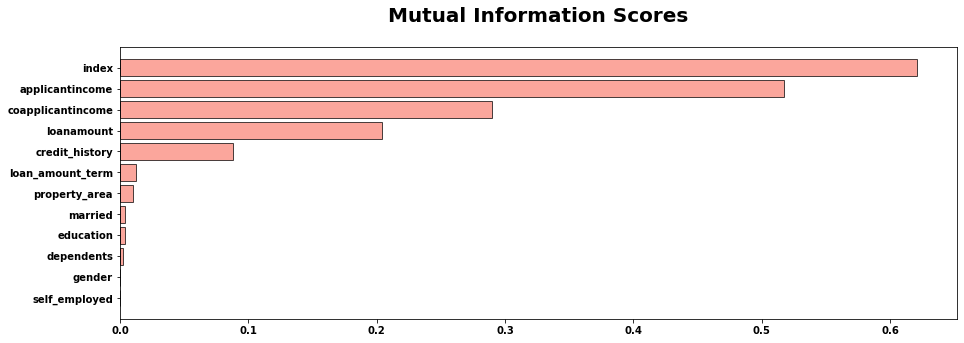

In [84]:
# variables
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
# plotting
plt.figure(figsize=(15, 5))
plt.barh(width, scores, color="salmon", alpha=0.7, edgecolor="k")
plt.yticks(width, ticks, weight="bold", )
plt.xticks(weight="bold")
plt.title("Mutual Information Scores",
          weight="bold",
          fontsize=20,
          pad=25);

### Feature Selection

In [87]:
# For now, let's just use income - current_job_yrs column
# I'll update and maybe use feature engineering in the future
features = ["applicantincome", "coapplicantincome", "loanamount", "credit_history", 
            "loan_amount_term", "property_area", "married","education","dependents"]

X_features = df_train[features]
y_labels = df_train["loan_status"]

X_features.shape, y_labels.shape

((614, 9), (614,))

In [88]:
X_features.head()

,applicantincome,coapplicantincome,loanamount,credit_history,loan_amount_term,property_area,married,education,dependents
0,5849,0.000,146.412,1.000,360.000,2,0,0,0
1,4583,1508.000,128.000,1.000,360.000,0,1,0,1
2,3000,0.000,66.000,1.000,360.000,2,1,0,0
3,2583,2358.000,120.000,1.000,360.000,2,1,1,0
4,6000,0.000,141.000,1.000,360.000,2,0,0,0


In [89]:
y_labels.value_counts()

1    422
0    192
Name: loan_status, dtype: int64

##### Random Under-Sampling

In [90]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df_train = df_train.sample(frac=1)